In Julia, you can represent the time-independent Schrödinger equation numerically for a one-dimensional system using finite difference methods or other numerical techniques. Here's a simple example where we solve the time-independent Schrödinger equation for a particle in a one-dimensional potential well using the finite difference method:

In [1]:
using LinearAlgebra
using Plots
using LaTeXStrings

In [2]:
# Define the parameters
ℏ = 1.0 # Planck's constant over 2π, set to 1 for simplicity
m = 1.0 # Mass of the particle, set to 1 for simplicity
L = 10.0 # Width of the potential well
N = 1000 # Number of points in the grid
x = LinRange(0, L, N) # Spatial grid
dx = x[2] - x[1] # Grid spacing

# Potential function V(x) (for a particle in a box, V = 0 inside the well and ∞ outside)
V = zeros(N)

# Construct the Hamiltonian using the finite difference approximation
H = zeros(N, N)
for i in 1:N
    H[i,i] = 2.0*ℏ^2/(m*dx^2) + V[i]
    if i > 1
        H[i,i-1] = -ℏ^2/(m*dx^2)
    end
    if i < N
        H[i,i+1] = -ℏ^2/(m*dx^2)
    end
end

# Solve the eigenvalue problem
𝖤, Φ = eigen(H) # Energies, WaveFunctions

# Normalize the wavefunctions
Ψₓ = [Ψ / sqrt(sum(abs2.(Ψ)*dx)) for Ψ in eachcol(Φ)]

# Now energies contains the energy levels and wavefunctions contains the corresponding wave functions

# For example, print the ground state energy and plot its wave function
println("Ground state energy: ", 𝖤[1])
Ψ₁ = Ψₓ[1]; @show typeof(Ψ₁);

Ground state energy: 0.09830196753505353
typeof(Ψ₁) = Vector{Float64}


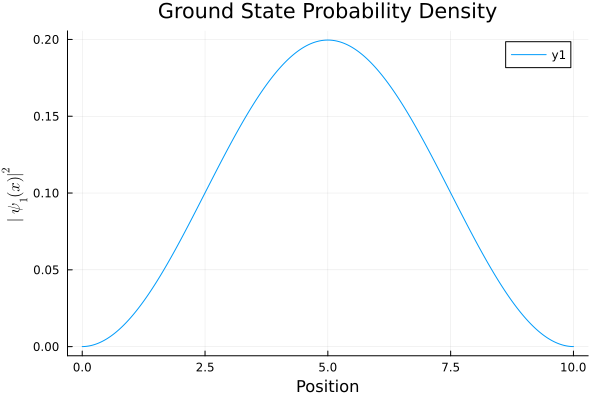

In [3]:
plot(x, abs2.(Ψ₁), title = "Ground State Probability Density", xlabel = "Position", ylabel = L"|ψ_1(x)|^2")

In this script, we:

1. Define the constants and parameters for the problem.
2. Set up the potential well \( V(x) \) to have zero potential inside and infinite potential outside, effectively simulating a "particle in a box" scenario.
3. Construct the Hamiltonian matrix \( H \) using the finite difference method to approximate the second derivative in the kinetic term of the Schrödinger equation.
4. Solve for the eigenvalues and eigenvectors of the Hamiltonian matrix, which correspond to the energy levels and wavefunctions of the system.
5. Normalize the wavefunctions and plot the probability density of the ground state.

You will need to have the `LinearAlgebra` and `Plots` packages installed in Julia to run this code. You can install these packages using Julia's package manager by typing `import Pkg; Pkg.add("Plots")` in the Julia REPL.